# Running Simulations with the Simulation API



---
## 1. Introduction to the Simulation API


The Simulation API is used for all actions related to a power system simulation. It is used to start, pause, restart, and stop a simulation from the command line or inside an application. It is all used to subscribe to measurements of equipment (such as line flows, loads, and DG setpoints) and the statuses of switches, capacitors, transformer taps, etc. It is also used to publish equipment control and other simulation input commands.

---
## 2. Using the Simulation API

### 2.1. Specifying the Topic

In the previous lessons all the queries passed to other APIs all used static `/queue/` channels to pass API calls to the GOSS message bus and the GridAPPS-D Platform. 

However, the Simulation API is used to communicate with a broad range of subscribers. The list of topics covered by the Simulation API cover both static `/queue/` and dynamic `/topic/` communication channel names. 

Extreme care is needed to use the correct topic. For a review of GridAPPS-D topics, see [Lesson 1.4.](Lesson%201.4.%20GridAPPS-D%20Topics.ipynb)

The correct topic for each Simulation API call will be provided in the corresponding section for each API task below.

[Return to Top](#Table-of-Contents)

### 2.2. Structure of a Simulation Message


Due to the wide range of tasks accomplished by the Simualtion API, there is no single message format that is used across all API Calls. 

Each message takes the form of a python dictionary or equivalent JSON script wrapped as a python string. 

The structure of each Simulation API call message will be provided in the corresponding section for each API task below.

---
## 3. Starting a Simulation

### 3.1. Specify the GridAPPS-D Topic 

This is a static `/queue/` communication channel

__1) Specifying the topic as a string:__

In [ ]:
topic = "goss.gridappsd.process.request.simulation"

__2) Using the topics library to specify the topic:__

In [ ]:
from gridappsd import topics as t
topic = t.REQUEST_SIMULATION

### 3.2. API Message Structure

To start a simulation from the command line or from inside an application, it is necessary to pass a message with a structure similar to that used by the Configuration File API (covered in [Lesson 2.5.](Lesson%202.5.%20Configuration%20File%20API.ipynb)) so that the GridAPPS-D platform can create a custom GridLab-D file from the CIM XML model stored in the Blazegraph Database.

The accepted set of key-value pairs for the Simulation API call to start a new simulation is

```
message = {
    "power_system_config": {
        "key1": "value1",
        "key2": "value2"},
    "simulation_config": {
        "key1": "value1",
        "key2": "value2",
        "model_creation_config": {
            "key1": "value1",
            "key2": "value2",
            "model_state": {
                "key1": "value1",
                "key2": "value2"} 
            }
         },
    "simulation_output": {
        "key1": "value1",
        "key2": "value2"},
    "application_config": [{
        "key1": "value1",
        "key2": "value2"}],
    "test_config": {
        "events": [{,
            "message": {
                "forward_differences": [{
                    "key1": "value1",
                    "key2": "value2"}]
                "reverse_differences": [{
                    "key1": "value1",
                    "key2": "value2"}],
            "key1": "value1",
            "key2": "value2"}
            }]       
    },
    "service_configs": {
        "key1": "value1",
        "key2": "value2"} 
}
```

The components of the message are identical to the options in the tabs in the GridAPPS-D. Each key-value pair is explained in detail below.

The components of the message are as follows:

#### 3.2.1. `"power_system_config":` 

This key is __required__ and specifies the CIM XML model to be imported and used for the simulation. Required key-value pairs are

```
"power_system_config": {   REQUIRED KEY                      REQUIRED VALUE
                     "GeographicalRegion_name":           mRID as string ,
                     "SubGeographicalRegion_name":        mRID as string ,
                     "Line_name":                         mRID as string }
                
```

As can be seen, the required key-value pairs are identical to those that are selected graphically using the GridAPPS-D Viz:

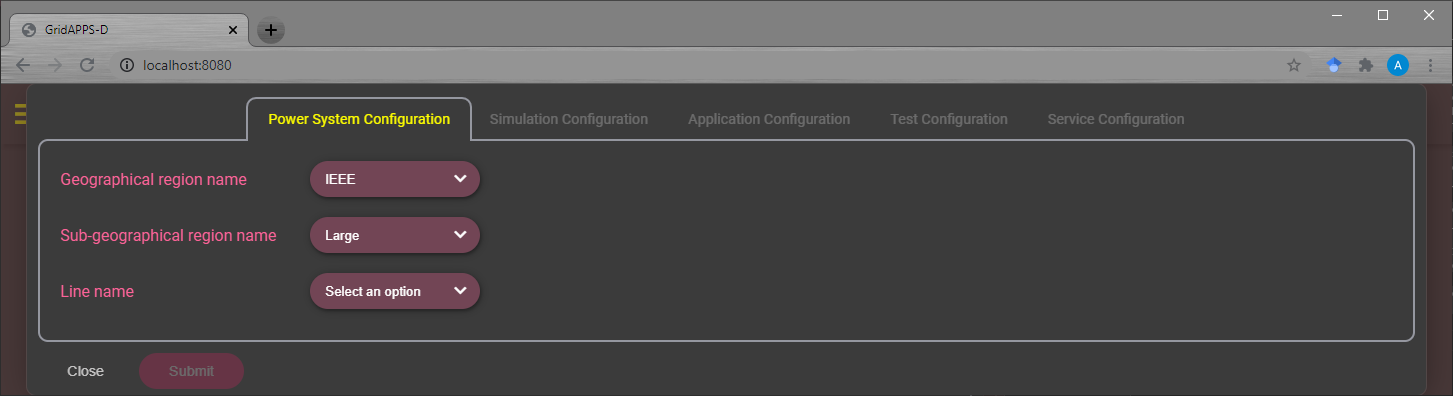

#### 3.2.2. `"simulation_config":` 

This key is __required__ and specifies the runtime parameters, such as simulation duration and time step. Required key-value pairs are

```
"simulation_config": {   REQUIRED KEY                      REQUIRED VALUE
                    "start_time":                    epoch time string ,
                    "duration":                      number (seconds) ,
                    "simulator":                     "GridLAB-D" ,
                    "timestep_frequency":            number (milliseconds) ,
                    "timestep_increment":            number (milliseconds) ,
                    "run_realtime":                  true OR false ,
                    "simulation_name":               string ,
                    "power_flow_solver_method":      "NR" ,
                    "model_creation_config":         key-value pairs }
```

The key `"model_creation_config":` is one of the __optional__ key-value pairs that can specified. This specifies the load profile and changes to the base case used for the simulation. Key-value pairs are

```
    "model_creation_config": { KEY                       VALUE
                        "load_scaling_factor":             number ,
                        "schedule_name":                   string ,
                        "z_fraction":                      number ,
                        "i_fraction":                      number ,
                        "p_fraction":                      number ,
                        "randomize_zipload_fractions":     true OR false ,
                        "use_houses":                      true OR false , 
                        "model_state":                     key-value pairs }
                        
```

The key `"model_state:"` is one of the __optional__ key-value pairs used to specify changes to switch positions and DER setpoints from the base case stored in the Blazegraph database. Key-value pairs are

```
        "model_state": {  
                        "synchronousmachines":[
                                {"name": "GLM/DSS name","p": number,"q": number},
                                {"name": "GLM/DSS name","p": number,"q": number}],
                        "switches":[
                                {"name":"GLM/DSS name", "open": true},
                                {"name":"GLM/DSS name", "open": false}]
            }
```

As can be seen, the required key-value pairs are identical to those that are selected graphically using the GridAPPS-D Viz. By default, only the required key-value pairs are listed in the viz. The simulation launched in the Viz can be configured using any of the `"model_creation_config"` and `"model_state"` key-value pairs.

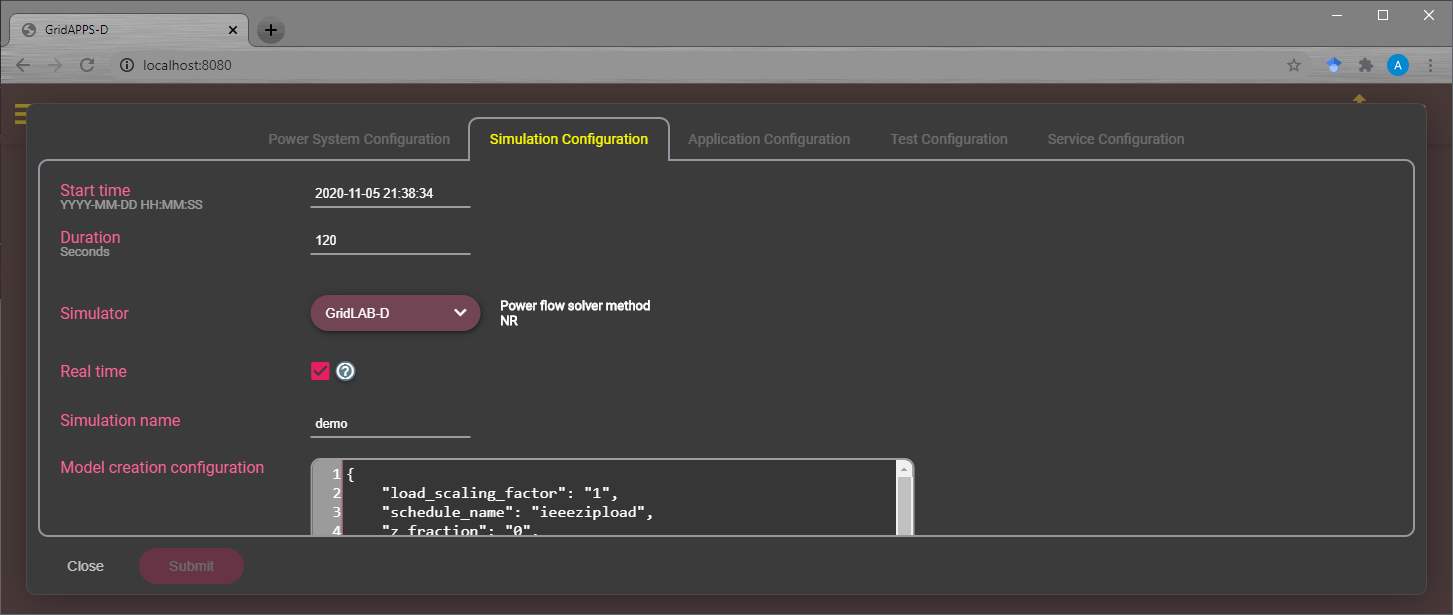

#### 3.2.3. `"application_config":` 

This key is __optional__ and specifies which applications will run during the simulation. The associated value is a list that specifies the name and application-specific configuration parameters. 

```
"application_config": {
        "applications": [
                {
                "name": "application1",
                "config_string": "application-specific config string"
                }, 
                {
                "name": "application2",
                "config_string": "application-specific config string"
                }]
}              
```

As can be seen, the required key-value pairs are identical to those that are selected graphically using the GridAPPS-D Viz. Note: simulations started using the GridAPPS-D Viz can only run one app at a time. This is due to the GUI design and not a limitation of the Simulation API.

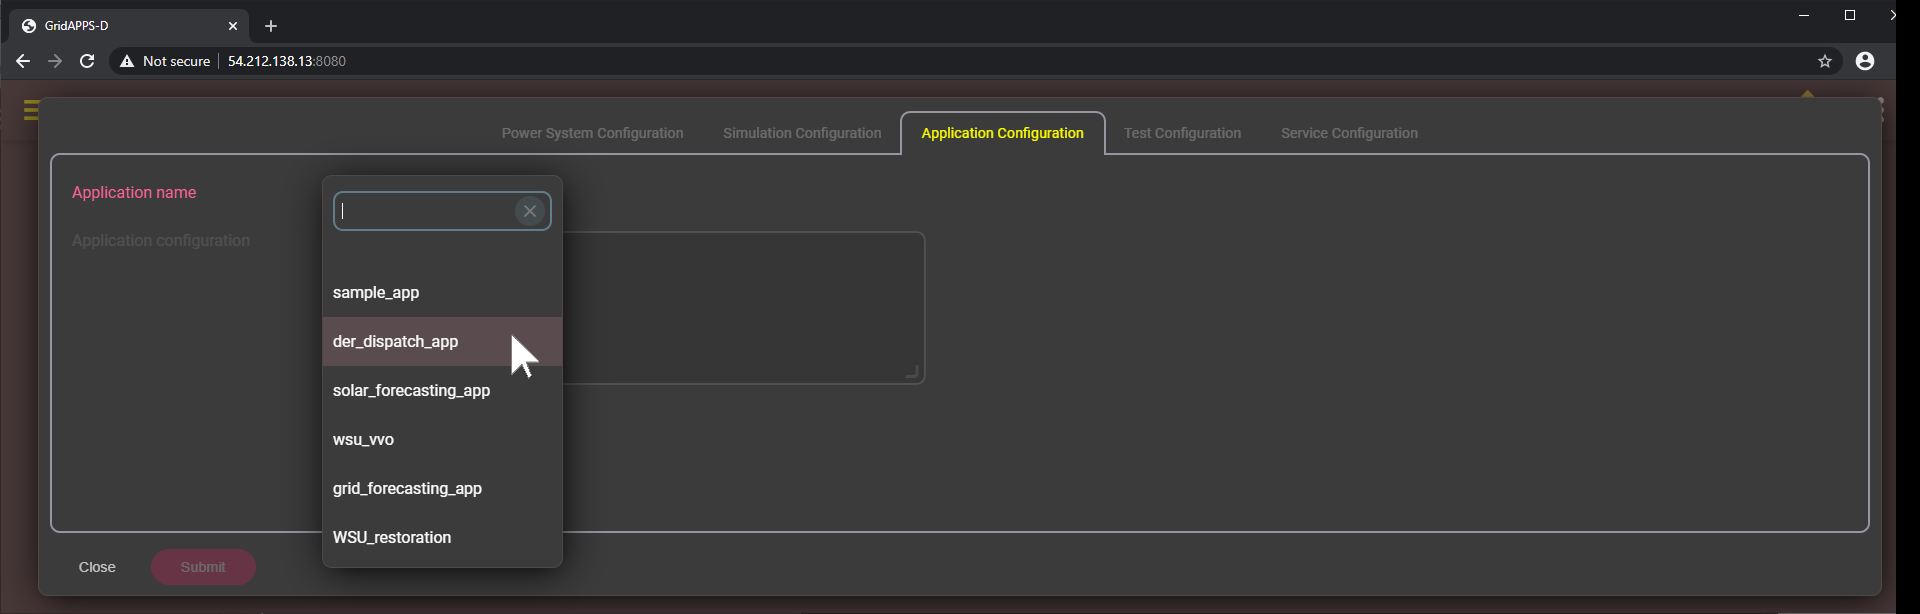

#### 3.2.4. `"test_config":`

This key is __optional__ and specifies whether any pre-scripted events should be scheduled to occur during the simulation, such as faults, communication outages, and equipment malfunctions. The events use the format of a __Difference Message__, which will be covered in Lesson 3.XX (to be released soon). The key-value pairs are

```
"test_config": {
        "events": [{
            "message": {
                "forward_differences": [
                    {
                        "object": "control object mRID",
                        "attribute": "CIM Class Attribute",
                        "value": number
                    }
                ],
                "reverse_differences": [
                    {
                        "object": "control object mRID",
                        "attribute": "CIM Class Attribute",
                        "value": number
                    }
                ]
            },
            "event_type": "ScheduledCommandEvent",
            "occuredDateTime": epoch time number,
            "stopDateTime": epoch time number
        }]
}    
```

As can be seen, the required key-value pairs are identical to those that are selected graphically using the GridAPPS-D Viz. The Viz offers the equivalent options to create line faults, communications outages, or upload a custom difference message JSON file.

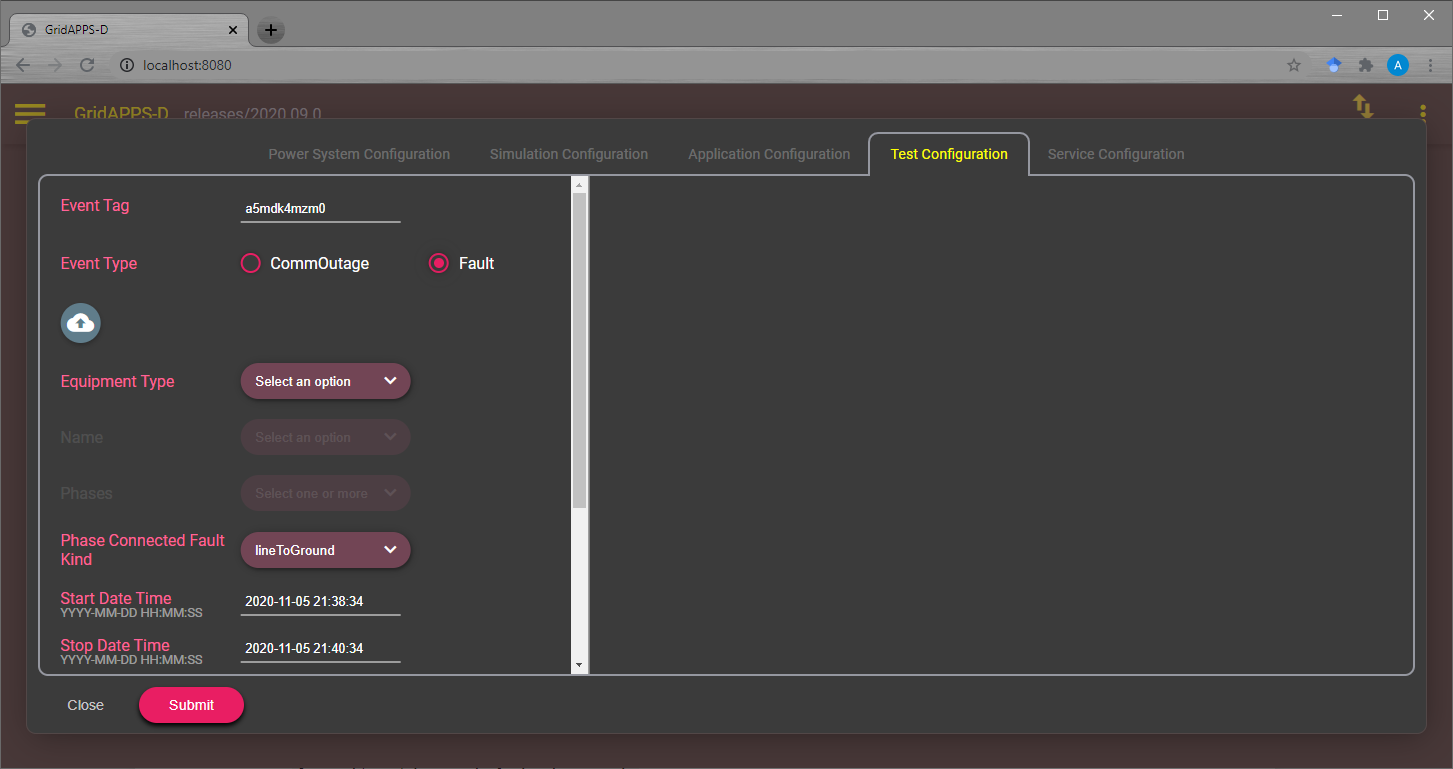

#### 3.2.5. `service_configs`

This key is used to start a GridAPPS-D service, such as the Sensor Service, State Estimator, or DNP3 Service. The key-value pairs for starting the service depend on the particular service and will be covered in the lessons for each GridAPPS-D service. 

#### 3.2.6. Complete Simulation Message

In [ ]:
 run_config_123 = {
    "power_system_config": {
        "GeographicalRegion_name": "_73C512BD-7249-4F50-50DA-D93849B89C43",
        "SubGeographicalRegion_name": "_1CD7D2EE-3C91-3248-5662-A43EFEFAC224",
        "Line_name": "_C1C3E687-6FFD-C753-582B-632A27E28507"
    },
    "application_config": {
        "applications": []
    },
    "simulation_config": {
        "start_time": "1570041113",
        "duration": "120",
        "simulator": "GridLAB-D",
        "timestep_frequency": "1000",
        "timestep_increment": "1000",
        "run_realtime": True,
        "simulation_name": "ieee123",
        "power_flow_solver_method": "NR",
        "model_creation_config": {
            "load_scaling_factor": "1",
            "schedule_name": "ieeezipload",
            "z_fraction": "0",
            "i_fraction": "1",
            "p_fraction": "0",
            "randomize_zipload_fractions": False,
            "use_houses": False
        }
    },
    "test_config": {
        "events": [{
            "message": {
                "forward_differences": [
                    {
                        "object": "_6C1FDA90-1F4E-4716-BC90-1CCB59A6D5A9",
                        "attribute": "Switch.open",
                        "value": 1
                    }
                ],
                "reverse_differences": [
                    {
                        "object": "_6C1FDA90-1F4E-4716-BC90-1CCB59A6D5A9",
                        "attribute": "Switch.open",
                        "value": 0
                    }
                ]
            },
            "event_type": "ScheduledCommandEvent",
            "occuredDateTime": 1570041140,
            "stopDateTime": 1570041200
        }]
    },
     "service_configs": [{
        "id": "gridappsd-sensor-simulator",
        "user_options": {
            "sensors-config": {
                "_99db0dc7-ccda-4ed5-a772-a7db362e9818": {
                    "nominal-value": 100,
                    "perunit-confidence-band": 0.02,
                    "aggregation-interval": 5,
                    "perunit-drop-rate": 0.01
                },
                "_ee65ee31-a900-4f98-bf57-e752be924c4d": {},
                "_f2673c22-654b-452a-8297-45dae11b1e14": {}
            },
            "random-seed": 0,
            "default-aggregation-interval": 30,
            "passthrough-if-not-specified": False,
            "default-perunit-confidence-band": 0.01,
            "default-perunit-drop-rate": 0.05
        }
    }]
}

### 3.3. Starting the Simulation

To start the simulation, we import the `gridappsd.simulation` library, which provides multiple shortcut functions for running and controlling a simulation. 

The python dictionary created in the previous section is then passed as an argument to Simulation object. The `.start_simulation()` method is then used to pass the Simulation API call to the GOSS Message Bus and the GridAPPS-D Platform.

The simulation id can be obtained by invoking the `.simulation_id` method.

In [ ]:
from gridappsd import GridAPPSD
from gridappsd.simulation import Simulation

gapps_sim = GridAPPSD()
simulation = Simulation(gapps_sim, run_config_123)
simulation.start_simulation()

simulation_id = simulation.simulation_id
print(simulation_id)

---
## 4. Pausing, Resuming, or Stopping a Simulation

### 4.1. Using the `gridappsd.simulation` Python Library

For simulations that are started using the `.start_simulation()` method of the `gridappsd.simulation` python library, it is possible to use the associated methods to pause, resume, and stop simulations. 

The library provides the following methods:

* `.pause()` -- Pause the simulation


* `.resume()` -- Resume the simulation


* `.resume_pause_at(pause_in)` -- Resume the simulation, and then pause it in so many seconds


* `.stop()` -- Stop the simulation


* `.run_loop()` -- Loop the entire simulation until interrupted

The `gridappsd.simulation` library also provides four types of events that can be registered: ontimestep, onmeasurement, oncomplete, and onstart.  To register one of the events call the method `.add_ontimestep_callback`, `.add_onmesurement_callback`, `.add_oncomplete_callback`, or `.add_onstart_callback` method respectively.

__Use of these methods will be covered in a later release of this training notebook.__

[Return to Top](#Table-of-Contents)

### 4.2. Using a Topic and Message 

If the simulation was started using the GridAPPS-D Viz, then pause, resume, and stop commands need to be issued using a topic and message. 

#### 4.2.1. Specifying the Topic

This is a dynamic `/topic/` communication channel that is best implemented by importing the GriAPPSD-Python library function for generating the correct topic. 


In [ ]:
viz_simulation_id = "459298943"

In [ ]:
from gridappsd.topics import simulation_input_topic
topic = simulation_input_topic(viz_simulation_id)

#### 4.2.2. Pause Message

The simulation can be paused using a very simple pause message. Since no response is expected from the Simulation API, we used the `.send(topic, message)` method for the GridAPPS-D connection object.


In [ ]:
message = {"command": "pause"}
gapps.send(topic, message)

#### 4.2.3. Resume Message

The simulation can be resumed using a very simple message. Since no response is expected from the Simulation API, we used the `.send(topic, message)` method for the GridAPPS-D connection object.


In [ ]:
message = {"command": "resume"}
gapps.send(topic, message)

#### 4.2.4. Resume then Pause Message

The simulation can be resumed and then paused using a very simple message. Since no response is expected from the Simulation API, we used the `.send(topic, message)` method for the GridAPPS-D connection object.


In [ ]:
message = {
    "command": "resumePauseAt",
    "input": {"pauseIn": 10}
}
gapps.send(topic, message)